# Loan Prediction

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

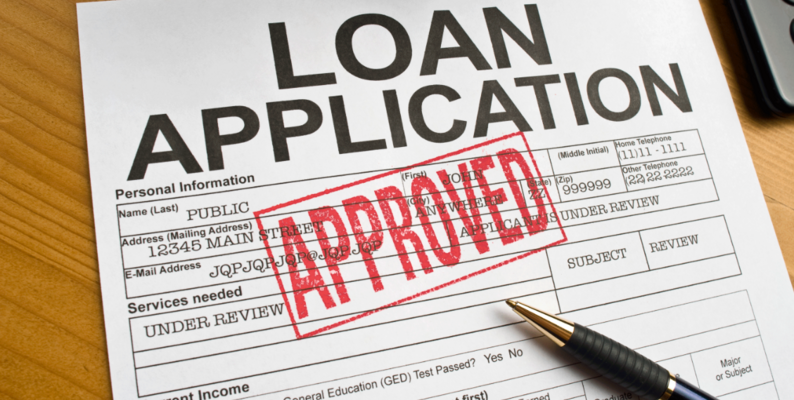

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Extracting**

In [ ]:
df = pd.read_csv("loan_data.csv")

In [ ]:
df.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,24,male,Master,NaN,1,NaN,45000,EDUCATION,12.09,0.08,2,321,No,0


# **Tranformation**

## Data Acquistion

In [ ]:
df.shape

(45003, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45003 entries, 0 to 45002
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45003 non-null  int64  
 1   person_gender                   45003 non-null  object 
 2   person_education                45003 non-null  object 
 3   person_income                   45002 non-null  float64
 4   person_emp_exp                  45003 non-null  int64  
 5   person_home_ownership           45002 non-null  object 
 6   loan_amnt                       45003 non-null  int64  
 7   loan_intent                     45003 non-null  object 
 8   loan_int_rate                   45003 non-null  float64
 9   loan_percent_income             45003 non-null  float64
 10  cb_person_cred_hist_length      45003 non-null  int64  
 11  credit_score                    45003 non-null  int64  
 12  previous_loan_defaults_on_file  

### Format Datatypes

In [ ]:
df["person_age"] = df["person_age"].astype(np.int16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45003 entries, 0 to 45002
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45003 non-null  int16  
 1   person_gender                   45003 non-null  object 
 2   person_education                45003 non-null  object 
 3   person_income                   45002 non-null  float64
 4   person_emp_exp                  45003 non-null  int64  
 5   person_home_ownership           45002 non-null  object 
 6   loan_amnt                       45003 non-null  int64  
 7   loan_intent                     45003 non-null  object 
 8   loan_int_rate                   45003 non-null  float64
 9   loan_percent_income             45003 non-null  float64
 10  cb_person_cred_hist_length      45003 non-null  int64  
 11  credit_score                    45003 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45003.000000,4.500200e+04,45003.000000,45003.000000,45003.000000,45003.000000,45003.000000,45003.000000,45003.000000
mean,27.763816,8.031794e+04,5.410017,9584.328600,11.006622,0.139729,5.867276,632.600893,0.222252
std,6.045078,8.042138e+04,6.063455,6318.015193,2.978816,0.087216,3.879668,50.458549,0.415764
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,321.000000,0.000000
25%,24.000000,4.720000e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578975e+04,8.000000,12240.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,45000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.isnull().sum()


,0
person_age,0
person_gender,0
person_education,0
person_income,1
person_emp_exp,0
person_home_ownership,1
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


**Person_income and person_home_ownership as  a null value**

# See distribution

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: person_gender
person_gender
male      24843
female    20160
Name: count, dtype: int64


Column: person_education
person_education
Bachelor       13400
Associate      12028
High School    11973
Master          6981
Doctorate        621
Name: count, dtype: int64


Column: person_home_ownership
person_home_ownership
RENT        23444
MORTGAGE    18489
OWN          2952
OTHER         117
Name: count, dtype: int64


Column: loan_intent
loan_intent
EDUCATION            9154
MEDICAL              8548
VENTURE              7820
PERSONAL             7553
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


Column: previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22858
No     22145
Name: count, dtype: int64




In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
0,35001
1,10002


As we can see imbalancing of data is seen  accepted is less then rejected to baisness can be added

In [ ]:
df.duplicated().sum()

np.int64(2)

2 duplicates row found

# Data Preprocessing

**Handling Numeric Missing Values**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['person_income'] = imputer.fit_transform(df[['person_income']])


**Handling Categorial Missing Values**

In [ ]:
mode_value = df['person_home_ownership'].mode()[0]

df['person_home_ownership'] = df['person_home_ownership'].fillna(mode_value)

**Fix Inconsistent Formats**

In [ ]:
df['person_gender'] = df['person_gender'].str.title()
df['person_education'] = df['person_education'].str.title()
df['person_home_ownership'] = df['person_home_ownership'].str.title()
df['loan_intent'] = df['loan_intent'].str.title()

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,Female,Master,71948.0,0,Rent,35000,Personal,16.02,0.49,3,561,No,1
1,24,Male,Master,67048.0,1,Rent,45000,Education,12.09,0.08,2,321,No,0
2,21,Female,High School,12282.0,0,Own,1000,Education,11.14,0.08,2,504,Yes,0
3,25,Female,High School,12438.0,3,Mortgage,5500,Medical,12.87,0.44,3,635,No,1
4,23,Female,Bachelor,79753.0,0,Rent,35000,Medical,15.23,0.44,2,675,No,1


**Handling Duplicates**

In [ ]:
df[df.duplicated(keep = False)]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
6,21,Female,High School,12951.0,0,Own,2500,Venture,7.14,0.19,2,532,No,1
7,21,Female,High School,12951.0,0,Own,2500,Venture,7.14,0.19,2,532,No,1
26,22,Male,Bachelor,97420.0,1,Rent,33950,Personal,14.54,0.35,4,691,No,1
27,22,Male,Bachelor,97420.0,1,Rent,33950,Personal,14.54,0.35,4,691,No,1


*As we can see that rows are being duplicates and caused error*

In [ ]:
df.shape

(45003, 14)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(45001, 14)

In [ ]:
numeric_cols = df.select_dtypes(include = ['float64','int64'])

# **Data - level visualizations**

**Checking Imbalancement**

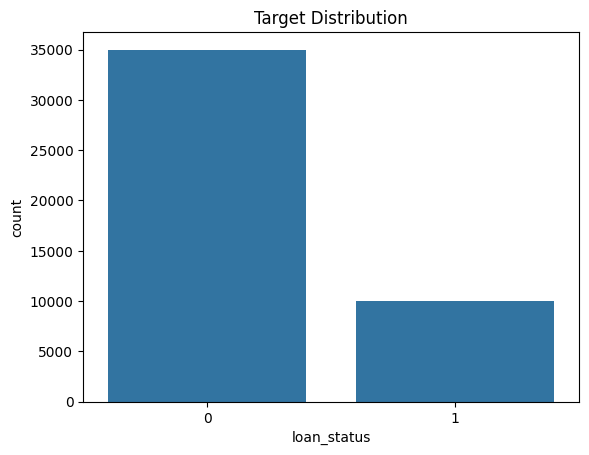

In [ ]:
sns.countplot(x='loan_status', data=df)
plt.title('Target Distribution')
plt.show()


### Class Imbalance Analysis

- **Uneven Distribution:** The dataset has significantly more cases with `loan_status = 0` than `loan_status = 1`.  
- **Imbalance Ratio:** Roughly 3.5 times as many instances of class 0 compared to class 1.  
- **Modeling Implications:** Due to this imbalance, standard accuracy can be misleading. Metrics like **Precision, Recall, and F1 Score** are essential for proper evaluation.  
- **Next Steps:** Consider techniques such as **stratified sampling**, **synthetic data generation (SMOTE)**, or **using class weights** during model training to prevent the model from biasing toward the majority class (0).


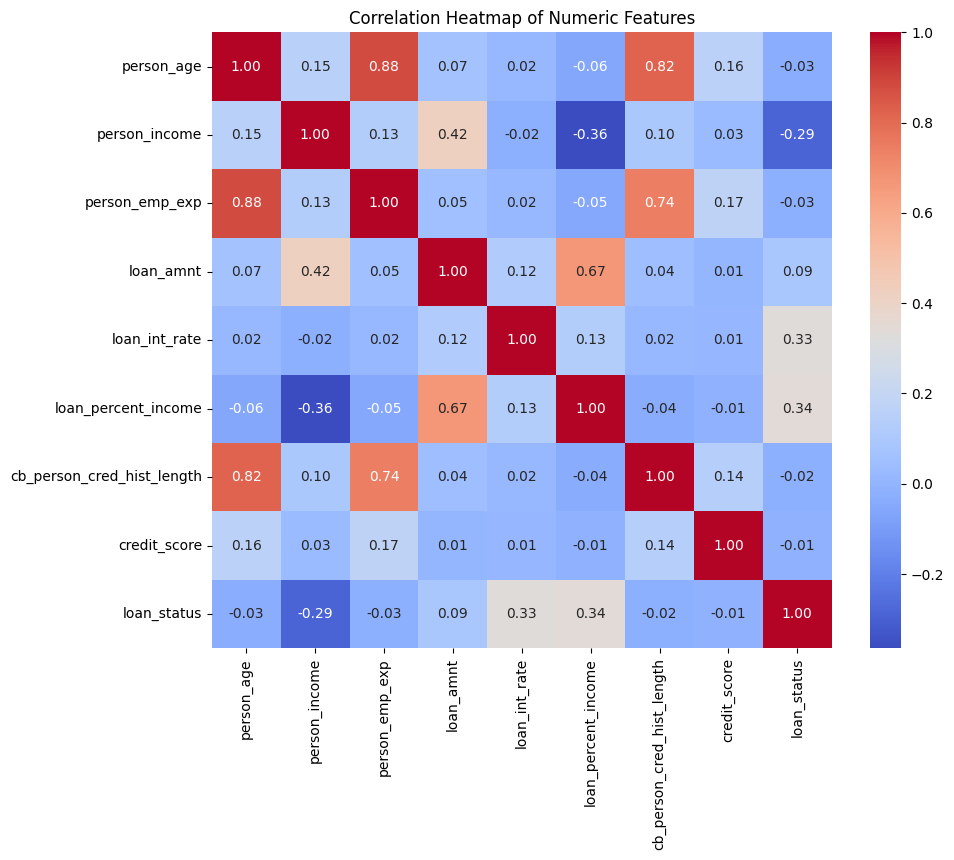

In [ ]:
df2 = df.select_dtypes(exclude= ["object"])
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Conclusion: Key Data Insights and Findings

**1. Strongest Predictors of Loan Status**  
- **loan_int_rate (0.33):** Loan interest rate shows the strongest positive correlation with loan_status. Higher interest rates are moderately associated with higher risk or default.  
- **loan_percent_income (0.34):** Percentage of a person's income dedicated to loan payments also shows a moderate positive correlation.  
- **loan_amnt (0.09):** Total loan amount has a weak positive correlation.  

**Insight:** Interest rate and loan-to-income percentage are the most influential numeric features for predicting loan_status.

---

**2. Features with Strong Inter-Correlations (Multicollinearity)**  
- **person_age & person_emp_exp (0.88):** Age and years of employment experience are very strongly linked.  
- **person_age & cb_person_cred_hist_length (0.82):** Age is strongly correlated with credit history length.  
- **person_emp_exp & cb_person_cred_hist_length (0.74):** Employment experience and credit history length are strongly correlated.  

**Insight:** These high correlations suggest potential redundancy; some features might be dropped or combined to improve model stability, especially in models sensitive to multicollinearity like Logistic Regression.

---

**3. Features with Very Weak or No Relationship to Loan Status**  
- **person_age (-0.03):** Age itself has almost no linear relationship with loan_status.  
- **credit_score (-0.01):** Credit score shows negligible correlation with loan_status in this dataset.  

**Insight:** These features have very little predictive power on their own and may be less useful in modeling.


# **Univariate Analysis (one variable at a time)**

> Numeric Features
> Distribution, skew, outliers





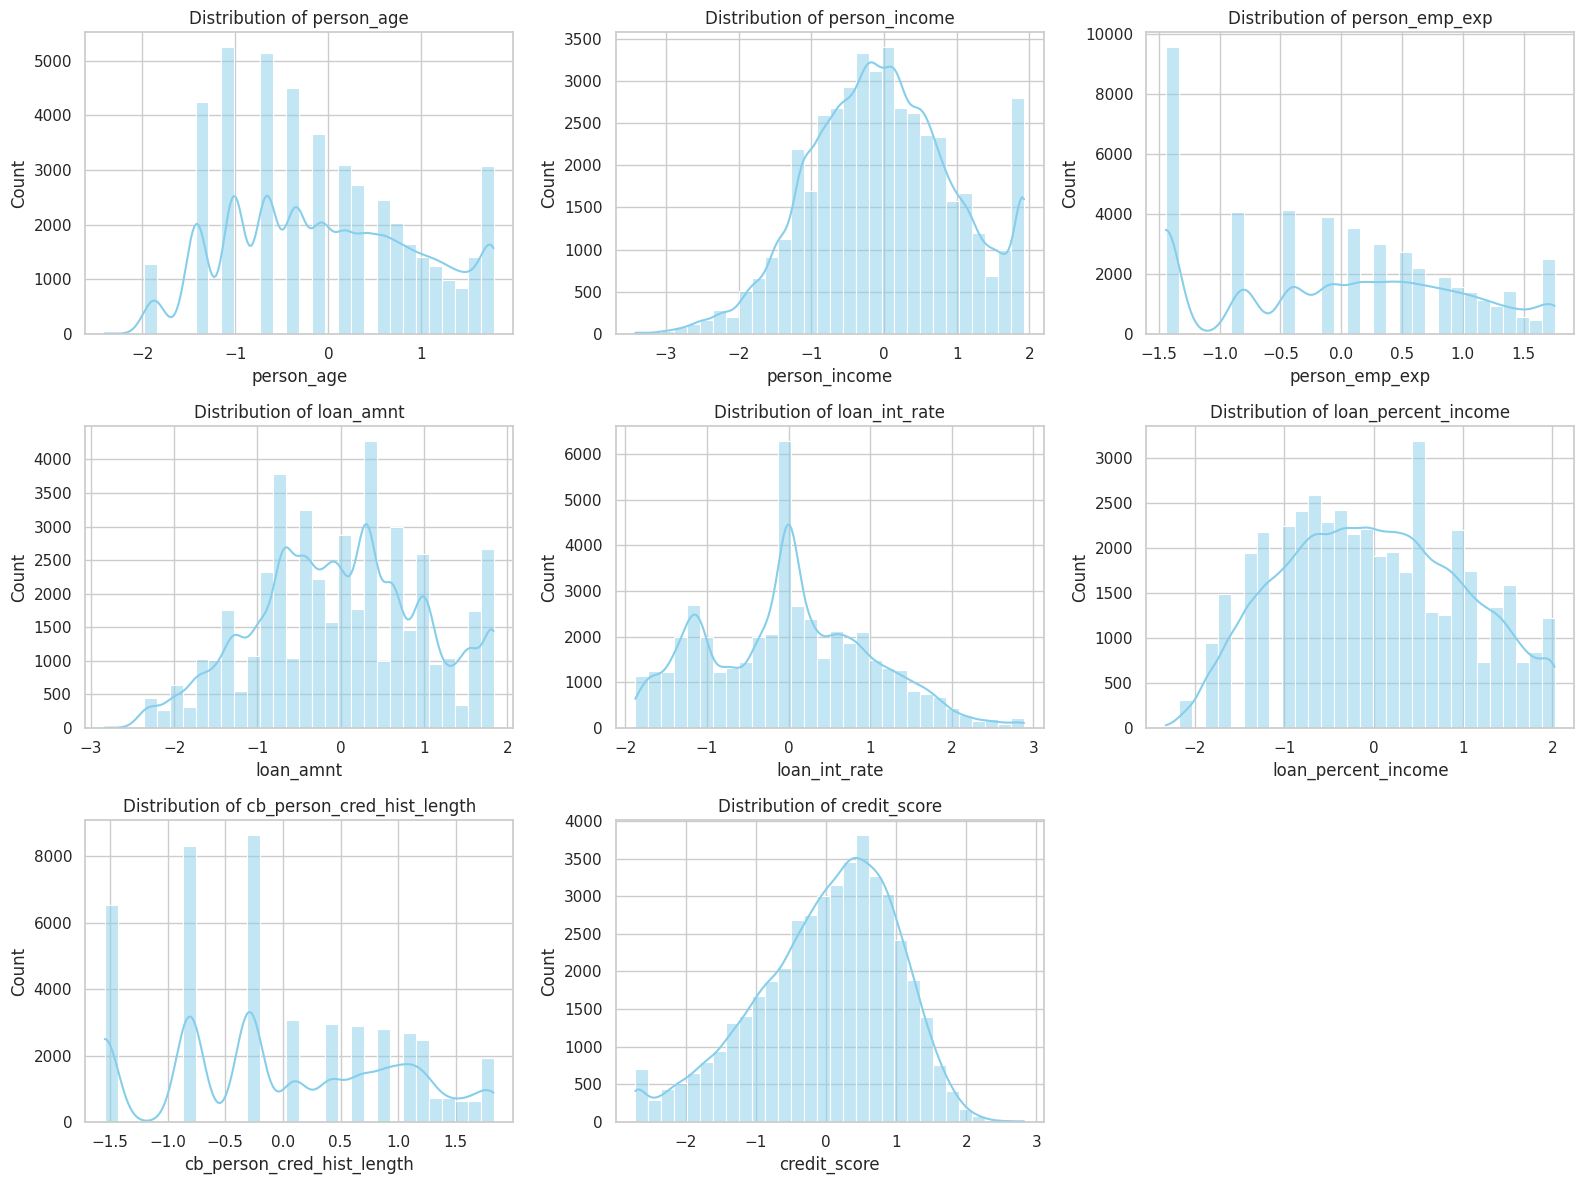

In [ ]:
plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Key Findings from Feature Distributions

**1. Bimodal / Multi-modal Distributions**  
- **loan_int_rate**
- **person_income**   

**2. Skewed / Non-Normal Distributions**  
- **person_age** and **loan_amnt:** Some skewness and multiple smaller peaks/valleys, reflecting variations in age brackets or loan amounts.  

**3. Generally Normal Distributions**  
- **credit_score** and **loan_percent_income:** Closer to a bell-shaped curve, which aligns well with modeling assumptions that assume normality.  

### Summary of Insights
- Feature distributions are diverse, with deviations from normality, especially in **bimodal interest rates**.  
- Preprocessing steps such as **robust scaling, Yeo-Johnson or log transformations** should be considered to improve model performance.


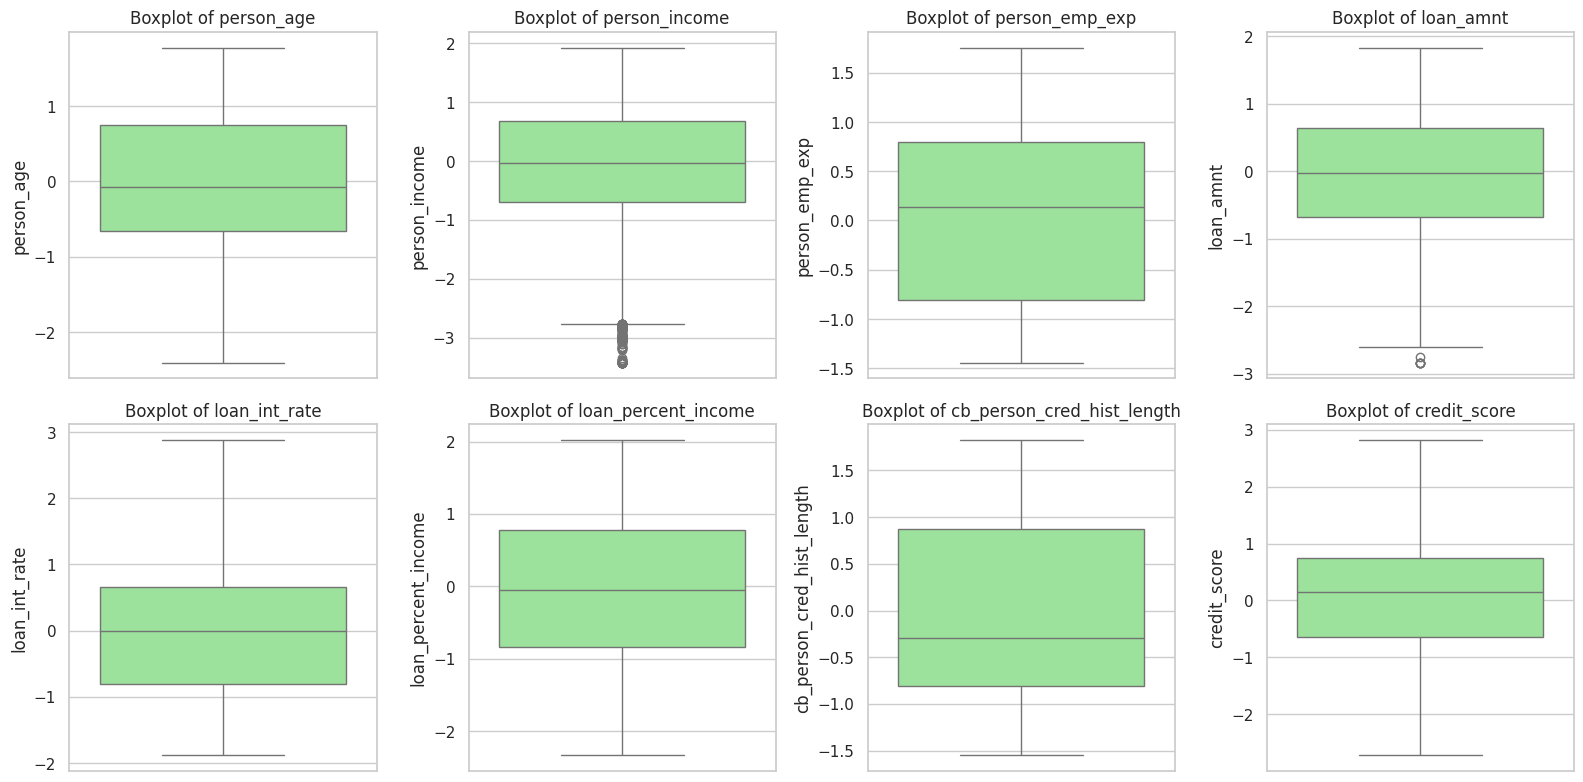

In [ ]:
# Boxplots for outliers
plt.figure(figsize=(16,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Summary of Insights
The boxplots confirm the presence of significant variability and numerous outliers across nearly all features, particularly in income and loan-related variables. This analysis suggests that robust scaling methods were likely appropriate, and you might need to further investigate or treat these extreme outliers to ensure they don't negatively impact the performance or stability of your machine learning models.




# **Categorical Features**

> Count distribution, imbalance




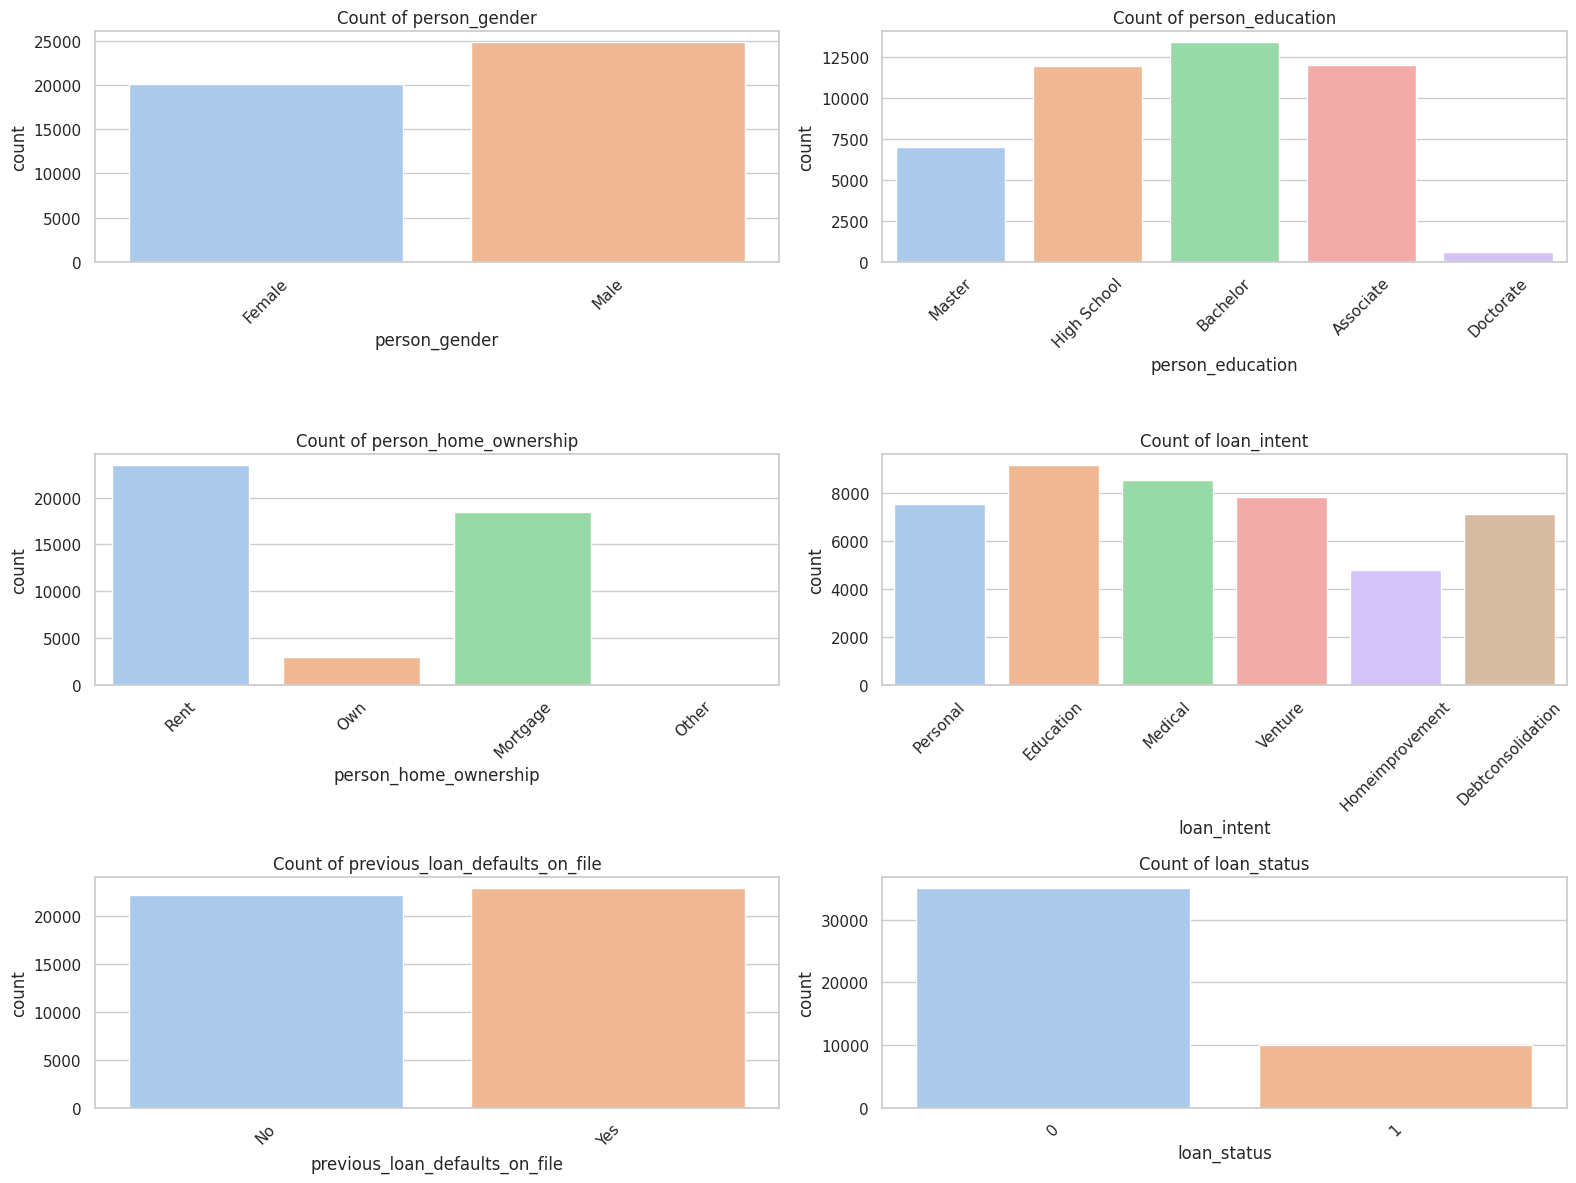

In [ ]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership',
                    'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']

plt.figure(figsize=(16,12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The dataset is characterized by an imbalanced target variable and a majority of applicants who rent their homes and lack previous defaults. These features provide a clear baseline for understanding the risk profiles present in the data before modeling begins.

# **Categorical vs Target**

> Countplot with hue

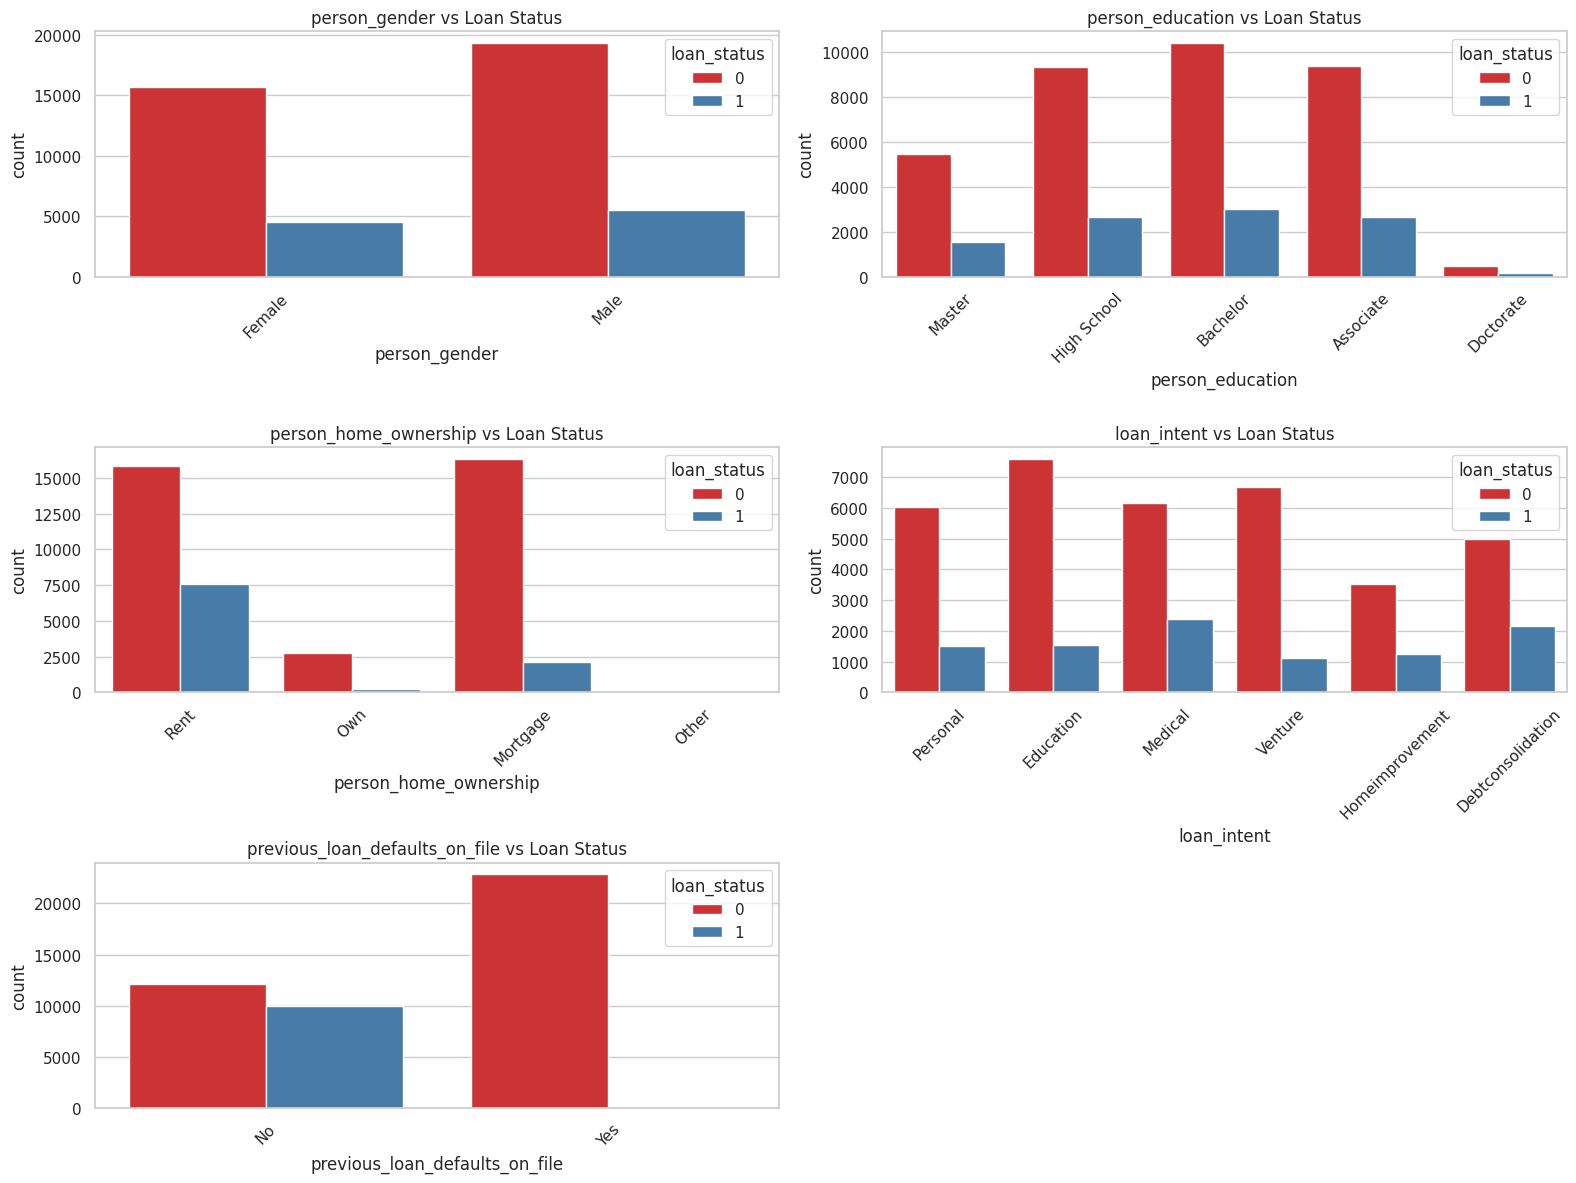

In [ ]:
plt.figure(figsize=(16,12))
for i, col in enumerate(categorical_cols):
    if col != 'loan_status':
        plt.subplot(3,2,i+1)
        sns.countplot(x=col, hue='loan_status', data=df, palette='Set1')
        plt.title(f'{col} vs Loan Status')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization indicates that previous default history and home ownership status are the most discriminative categorical features for predicting loan status. Features like gender and education level appear to have less influence on the final outcome.

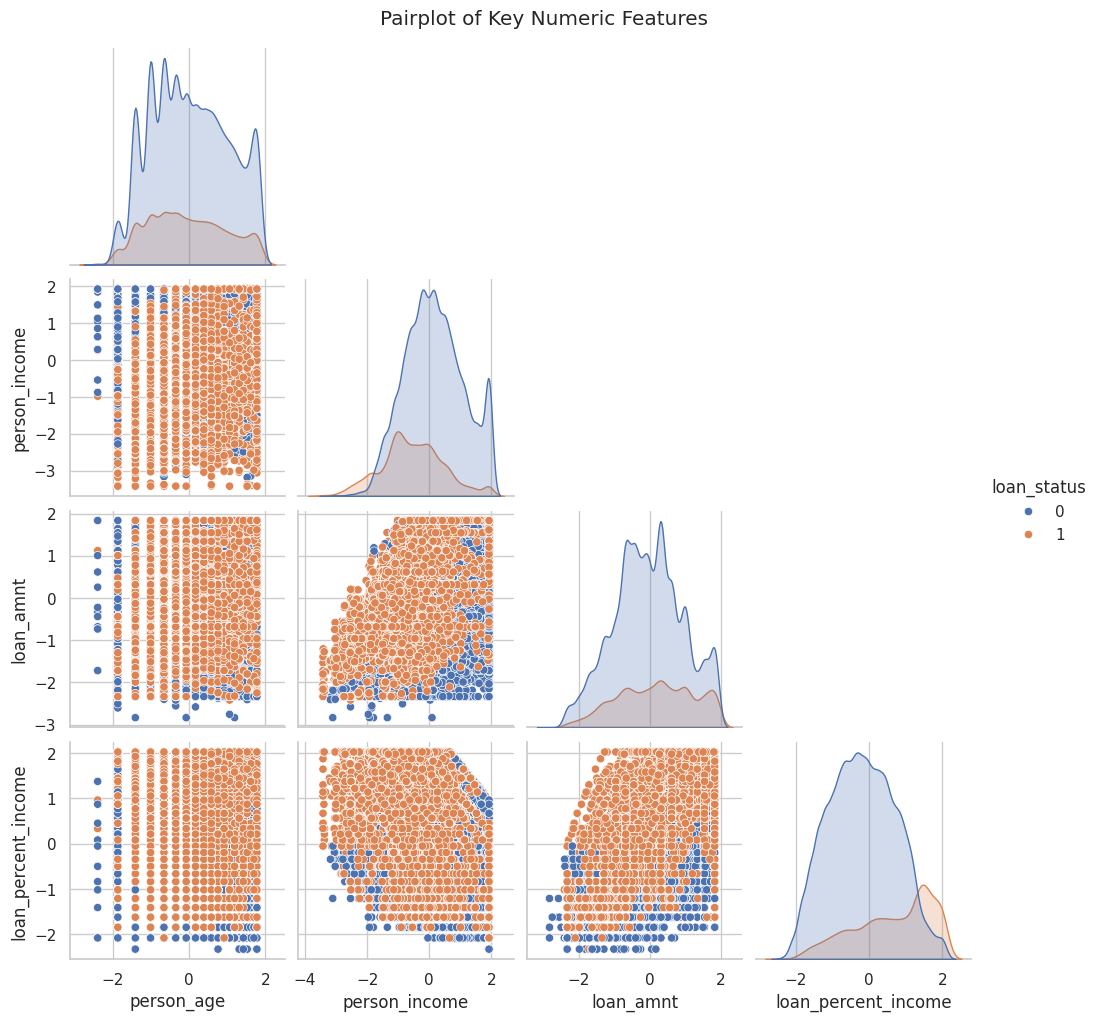

In [ ]:
key_features = ['person_age', 'person_income', 'loan_amnt', 'loan_percent_income', 'loan_status']
sns.pairplot(df[key_features], hue='loan_status', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()


The pair plots confirm that risk indicators such as a high loan_percent_income, sometimes combined with a relatively lower person_income or higher loan_amnt, form distinct data clusters for the 'Loan' status. This visualization validates the previous correlation analysis and suggests that the models can leverage these combined feature interactions to make accurate predictions.




## **Detect & Correct Errors**




In [ ]:
num_cols = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate',
            'loan_percent_income','cb_person_cred_hist_length','credit_score']

In [ ]:
skewness = df[num_cols].skew()
print("Skewness of numerical features:\n", skewness)


Skewness of numerical features:
 person_age                     2.548186
person_income                 34.137942
person_emp_exp                 2.594940
loan_amnt                      1.182051
loan_int_rate                  0.213762
loan_percent_income            1.034546
cb_person_cred_hist_length     1.631728
credit_score                  -0.614315
dtype: float64


*Some of the coluns have high skenwess maybe rising outlier*

In [ ]:
high_skew_cols = ['person_income', 'person_emp_exp', 'loan_amnt',
                  'loan_percent_income', 'cb_person_cred_hist_length']

neg_counts = (df[num_cols] < 0).sum()
print("Negative values count per feature:\n", neg_counts)


Negative values count per feature:
 person_age                    0
person_income                 0
person_emp_exp                0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
credit_score                  0
dtype: int64


*No negative values in dataset*

**Focusing on  high skewed data**

In [ ]:
zero_counts = (df[high_skew_cols] == 0).sum()
print("Zero values count per feature:\n", zero_counts)

Zero values count per feature:
 person_income                    0
person_emp_exp                9566
loan_amnt                        0
loan_percent_income             27
cb_person_cred_hist_length       0
dtype: int64


Over here we see that *`person_emp_exp`* and *`loan_percent_income`*  have zero values





**Outlier Detection**

In [ ]:
numeric_cols = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

df_num = df[numeric_cols]

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))
df_outliers = df_num[outlier_mask.any(axis=1)]

num_outliers = df_outliers.shape[0]
total_rows = df_num.shape[0]
pct_outliers = (num_outliers / total_rows * 100)

print(f"Number of detected error/outlier rows: {num_outliers}")
print(f"Percentage of dataset flagged as outliers: {pct_outliers:.2f}%")

print("\nOutlier counts per column:")
print(outlier_mask.sum().sort_values(ascending=False))


Number of detected error/outlier rows: 7452
Percentage of dataset flagged as outliers: 16.56%

Outlier counts per column:
loan_amnt                     2349
person_income                 2218
person_age                    2188
person_emp_exp                1724
cb_person_cred_hist_length    1366
loan_percent_income            744
credit_score                   468
loan_int_rate                  124
dtype: int64


In [ ]:
!pip install feature_engine

In [ ]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=numeric_cols
)

df[numeric_cols] = winsor.fit_transform(df[numeric_cols])

print(" Winsorization completed for numeric columns.")
print(numeric_cols)


 Winsorization completed for numeric columns.
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


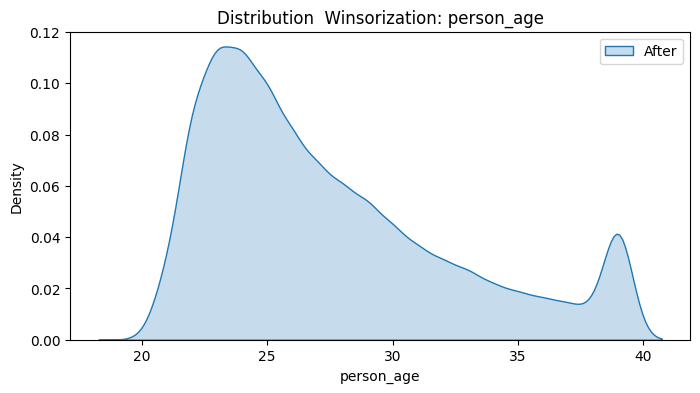

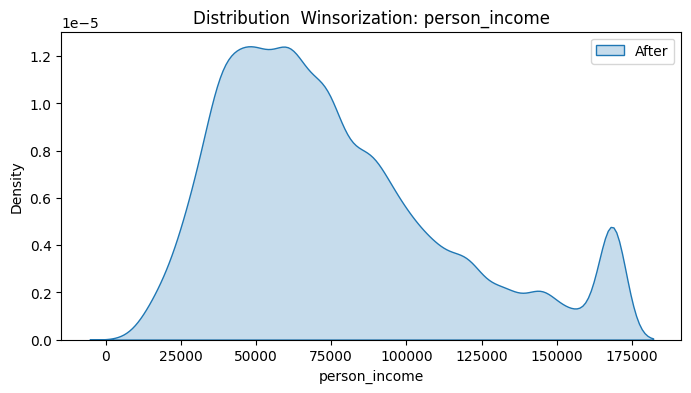

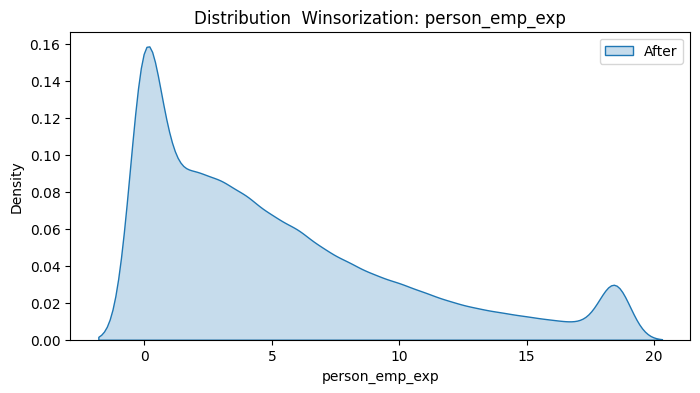

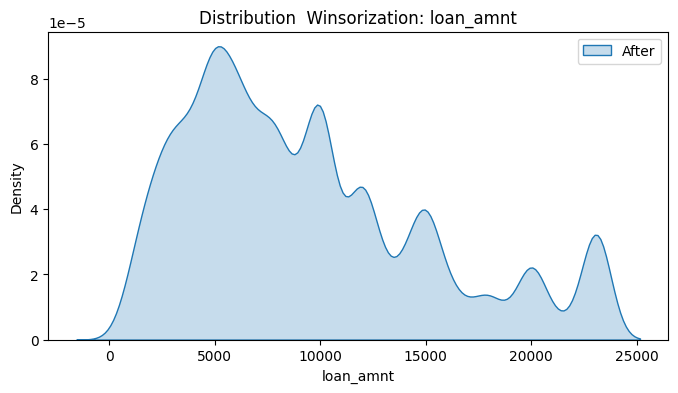

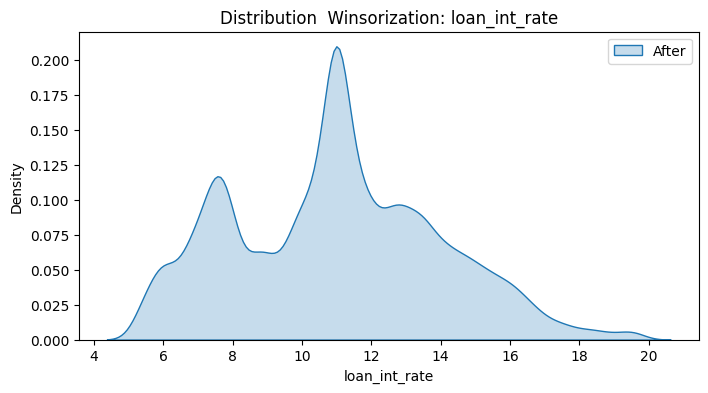

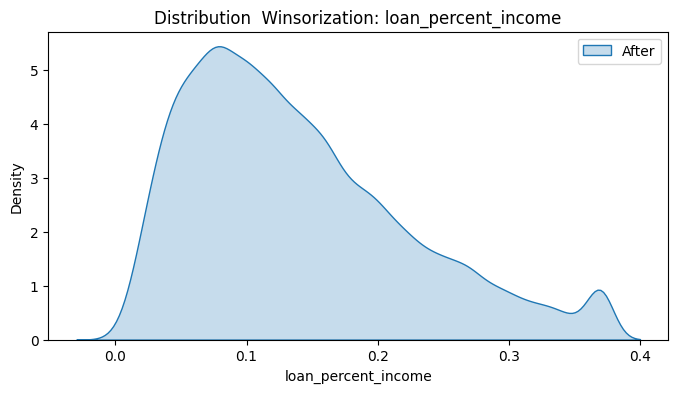

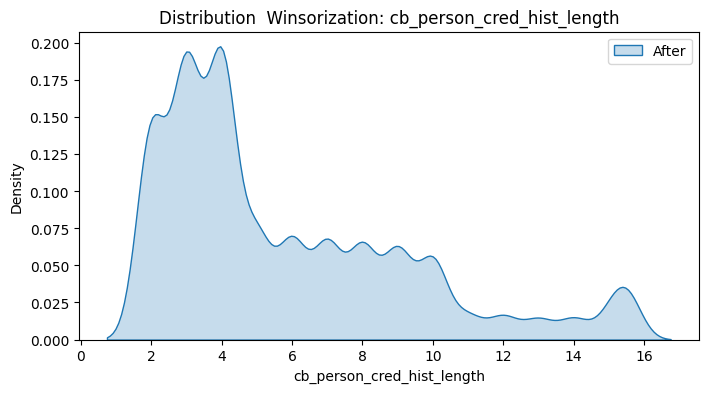

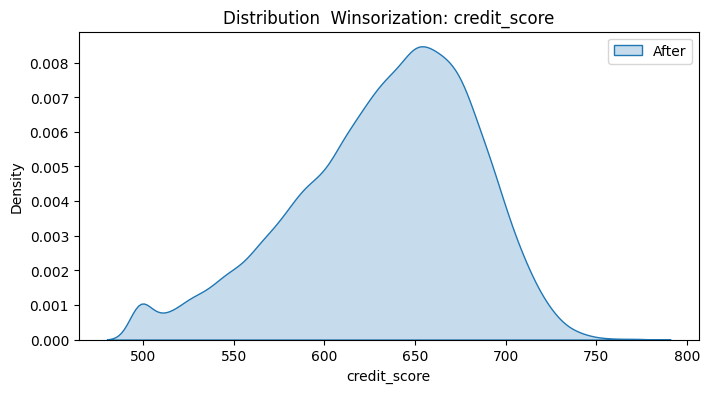

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], label='After', fill=True)
    plt.title(f"Distribution  Winsorization: {col}")
    plt.legend()
    plt.show()


In [ ]:
skewness = df[numeric_cols].skew()
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 person_age                    0.914670
person_income                 0.874619
person_emp_exp                1.073219
loan_amnt                     0.813509
loan_int_rate                 0.207146
loan_percent_income           0.828131
cb_person_cred_hist_length    1.105052
credit_score                 -0.532783
dtype: float64


In [ ]:
high_skew_cols = ['person_income', 'person_emp_exp', 'loan_amnt',
                  'loan_percent_income', 'cb_person_cred_hist_length']

neg_counts = (df[num_cols] < 0).sum()
print("Negative values count per feature:\n", neg_counts)

Negative values count per feature:
 person_age                    0
person_income                 0
person_emp_exp                0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
credit_score                  0
dtype: int64


# **Loading**

In [ ]:
df.to_csv("ETL_Perfromed_dataset.csv")

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import PowerTransformer
# High-skew numeric columns (skew > 0.75)
high_skew_cols = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df[high_skew_cols] = pt.fit_transform(df[high_skew_cols])
print("Skewness after Yeo-Johnson transformation:")
print(df[high_skew_cols].skew())


Skewness after Yeo-Johnson transformation:
person_age                    0.123188
person_income                -0.009936
person_emp_exp               -0.046653
loan_amnt                    -0.041961
loan_percent_income           0.090951
cb_person_cred_hist_length    0.068107
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Skewness after Yeo-Johnson (high-skew features):")
print(df[high_skew_cols].skew())

Skewness after Yeo-Johnson (high-skew features):
person_age                    0.123188
person_income                -0.009936
person_emp_exp               -0.046653
loan_amnt                    -0.041961
loan_percent_income           0.090951
cb_person_cred_hist_length    0.068107
dtype: float64


In [ ]:
skewness = df[numeric_cols].skew()
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 person_age                    0.123188
person_income                -0.009936
person_emp_exp               -0.046653
loan_amnt                    -0.041961
loan_int_rate                 0.207146
loan_percent_income           0.090951
cb_person_cred_hist_length    0.068107
credit_score                 -0.532783
dtype: float64


In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-1.415899,Female,Master,0.100567,-1.442398,Rent,1.835643,Personal,1.684908,2.023675,-0.807664,-1.441748,No,1
1,-0.664252,Male,Master,-0.037518,-0.803121,Rent,1.835643,Education,0.364347,-0.664081,-1.545450,-2.716738,No,0
2,-1.874872,Female,High School,-2.847631,-1.442398,Own,-2.333646,Education,0.045127,-0.664081,-1.545450,-2.586227,Yes,0
3,-0.354456,Female,High School,-2.829975,-0.103251,Mortgage,-0.555633,Medical,0.626443,2.023675,-0.807664,0.044067,No,1
4,-1.015518,Female,Bachelor,0.305628,-1.442398,Rent,1.835643,Medical,1.419452,2.023675,-1.545450,0.847210,No,1


In [ ]:
cat_cols = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
cat_encoded = ohe.fit_transform(df[cat_cols])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_cols))
df = df.drop(cat_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), cat_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_Male,...,person_education_Master,person_home_ownership_Other,person_home_ownership_Own,person_home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,previous_loan_defaults_on_file_Yes
0,-1.415899,0.100567,-1.442398,1.835643,1.684908,2.023675,-0.807664,-1.441748,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.664252,-0.037518,-0.803121,1.835643,0.364347,-0.664081,-1.545450,-2.716738,0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.874872,-2.847631,-1.442398,-2.333646,0.045127,-0.664081,-1.545450,-2.586227,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.354456,-2.829975,-0.103251,-0.555633,0.626443,2.023675,-0.807664,0.044067,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.015518,0.305628,-1.442398,1.835643,1.419452,2.023675,-1.545450,0.847210,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


**Feature Selection**

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et.fit(X, y)
importances = pd.Series(et.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)
print(top_features)


previous_loan_defaults_on_file_Yes    0.391772
loan_int_rate                         0.106235
loan_percent_income                   0.100422
person_income                         0.078377
person_home_ownership_Rent            0.052863
loan_amnt                             0.046967
credit_score                          0.040144
person_age                            0.032186
person_emp_exp                        0.029787
cb_person_cred_hist_length            0.029614
person_gender_Male                    0.013518
loan_intent_Venture                   0.010862
person_home_ownership_Own             0.010223
person_education_Bachelor             0.009862
person_education_High School          0.008927
loan_intent_Education                 0.007877
person_education_Master               0.007877
loan_intent_Personal                  0.006886
loan_intent_Medical                   0.006764
loan_intent_Homeimprovement           0.006196
dtype: float64


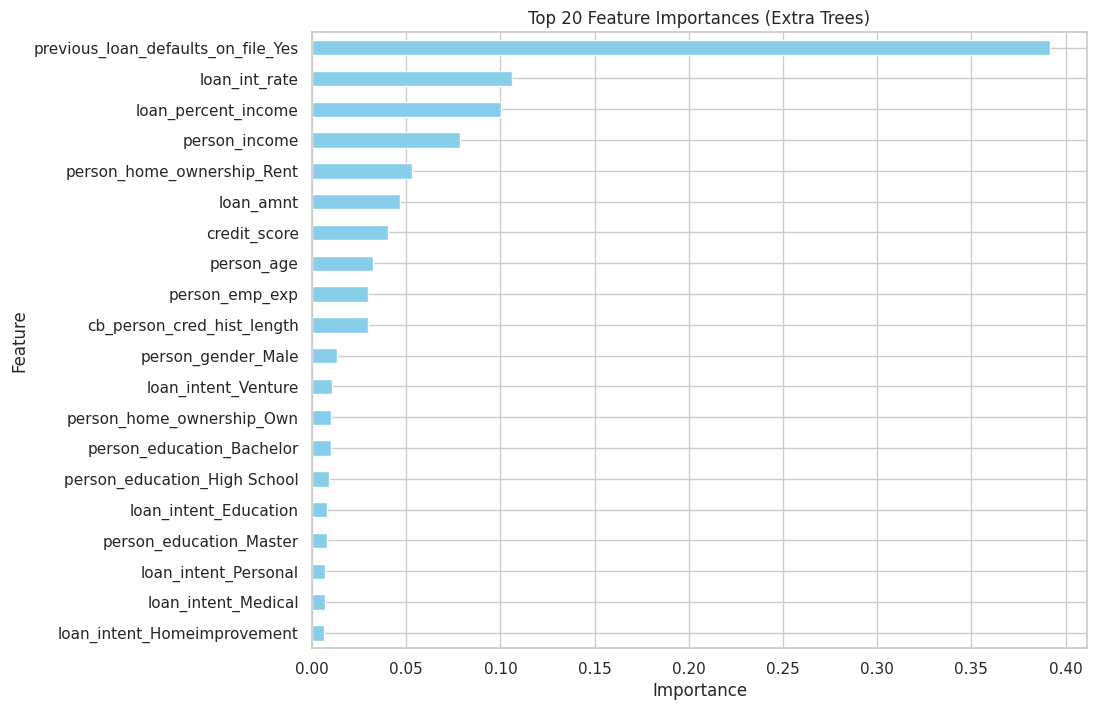

In [ ]:
plt.figure(figsize=(10,8))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 Feature Importances (Extra Trees)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
df.shape

(45001, 23)

In [ ]:
selected_features = [
    'previous_loan_defaults_on_file_Yes',
    'loan_int_rate',
    'loan_percent_income',
    'person_income',
    'person_home_ownership_Rent',
    'loan_amnt',
    'credit_score',
    'person_age',
    'person_emp_exp',
    'cb_person_cred_hist_length',
    'person_gender_Male',
    'loan_intent_Venture',
    'person_home_ownership_Own'
]


X = df[selected_features]
y = df['loan_status']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report


In [ ]:

lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
svm = SVC(class_weight='balanced', probability=True, random_state=42)


In [ ]:
models = {'Logistic Regression': lr, 'Random Forest': rf, 'SVM': svm}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    # Metrics
    print(f"--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4) if y_prob is not None else "N/A")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.8568
F1 Score: 0.7429
ROC-AUC: 0.9509
Confusion Matrix:
 [[5850 1151]
 [ 138 1862]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      7001
           1       0.62      0.93      0.74      2000

    accuracy                           0.86      9001
   macro avg       0.80      0.88      0.82      9001
weighted avg       0.90      0.86      0.87      9001



--- Random Forest ---
Accuracy: 0.9216
F1 Score: 0.8107
ROC-AUC: 0.9724
Confusion Matrix:
 [[6783  218]
 [ 488 1512]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7001
           1       0.87      0.76      0.81      2000

    accuracy                           0.92      9001
   macro avg       0.90      0.86      0.88      9001
weighted avg       0.92      0.92      0.92      9001



--- SVM ---
Accuracy: 0.8657
F1 Score: 0.7564
ROC-AU

Random Forest is the recommended model due to its high precision and F1 score for predicting loan defaults, along with excellent overall accuracy and ROC-AUC.

Logistic Regression and SVM favor recall over precision, which could lead to more false positives.

In [ ]:
from sklearn.metrics import precision_score

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Precision for minority class (loan_status=1)
    precision_minority = precision_score(y_test, y_pred, pos_label=1)

    # Precision for majority class (loan_status=0)
    precision_majority = precision_score(y_test, y_pred, pos_label=0)

    print(f"--- {name} ---")
    print(f"Precision (minority class, loan_status=1): {precision_minority:.4f}")
    print(f"Precision (majority class, loan_status=0): {precision_majority:.4f}\n")


--- Logistic Regression ---
Precision (minority class, loan_status=1): 0.6180
Precision (majority class, loan_status=0): 0.9770

--- Random Forest ---
Precision (minority class, loan_status=1): 0.8740
Precision (majority class, loan_status=0): 0.9329

--- SVM ---
Precision (minority class, loan_status=1): 0.6335
Precision (majority class, loan_status=0): 0.9796



In [ ]:


for name, model in models.items():
    y_pred = model.predict(X_test)

    # Overall precision (macro)
    overall_precision = precision_score(y_test, y_pred, average='weighted')
    print(f"{name} - Overall Precision: {overall_precision:.4f}")


Logistic Regression - Overall Precision: 0.8972
Random Forest - Overall Precision: 0.9198
SVM - Overall Precision: 0.9027


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score

comparison = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    comparison.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred),4),
        'F1 (minority class)': round(f1_score(y_test, y_pred, pos_label=1),4),
        'F1 (overall)': round(f1_score(y_test, y_pred, average='weighted'),4),
        'ROC-AUC': round(roc_auc_score(y_test, y_prob),4) if y_prob is not None else 'N/A',
        'Precision (minority class)': round(precision_score(y_test, y_pred, pos_label=1),4),
        'Precision (overall)': round(precision_score(y_test, y_pred, average='weighted'),4)
    })

import pandas as pd
comparison_df = pd.DataFrame(comparison)
print("Model Comparison Table:\n")



Model Comparison Table:



In [ ]:
comparison_df

,Model,Accuracy,F1 (minority class),F1 (overall),ROC-AUC,Precision (minority class),Precision (overall)
0,Logistic Regression,0.8568,0.7429,0.8657,0.9509,0.6180,0.8972
1,Random Forest,0.9216,0.8107,0.9195,0.9724,0.8740,0.9198
2,SVM,0.8657,0.7564,0.8738,0.9589,0.6335,0.9027


Model Comparison:

- Logistic Regression: Accuracy=0.857, F1 (minority)=0.743, Overall F1=0.866, ROC-AUC=0.951, Precision (minority)=0.618, Overall Precision=0.897
- Random Forest: Accuracy=0.922, F1 (minority)=0.811, Overall F1=0.920, ROC-AUC=0.972, Precision (minority)=0.874, Overall Precision=0.920 ✅
- SVM: Accuracy=0.866, F1 (minority)=0.756, Overall F1=0.874, ROC-AUC=0.959, Precision (minority)=0.634, Overall Precision=0.903

✅ Random Forest performs best overall, especially for predicting loan defaults (high F1 and precision for minority class).

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model = rf

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)[:,1]

print("\nRandom Forest after GridSearchCV tuning:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_best_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_best_rf), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_best_rf), 4))


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest after GridSearchCV tuning:
Accuracy: 0.9215
F1 Score: 0.8235
ROC-AUC: 0.9722


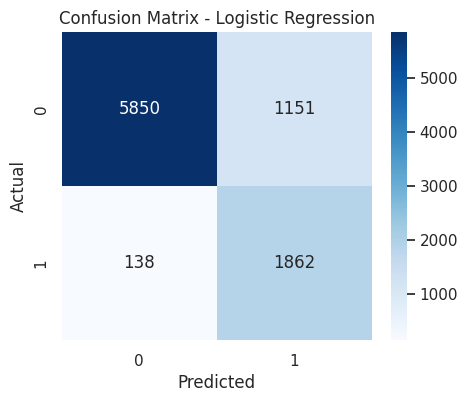

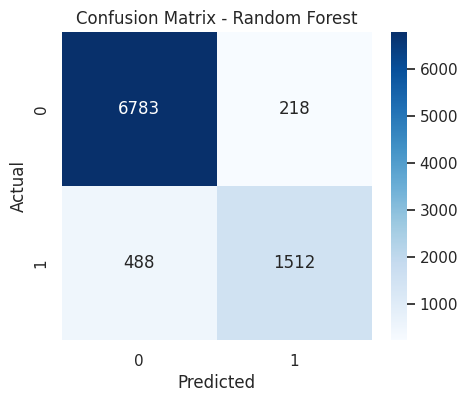

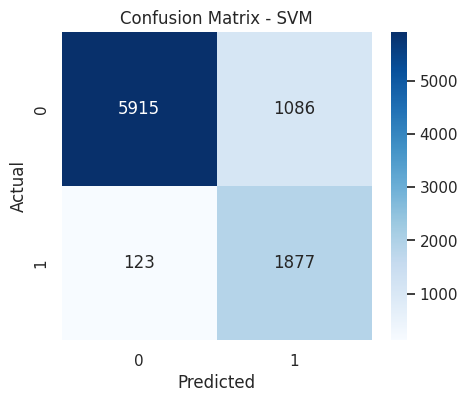

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_conf_matrix(y_test, y_pred, name)


The Random Forest model provides the best balance of these metrics and is the recommended model for deployment, as it offers a strong F1 score 81.1\% and the highest precision {87.4\%} of the three tested algorithms.

## **Roc-Auc curve**
>Not suitable or imbalanced dataset

>Measures how well a classifier distinguishes between positive and negative classes across all thresholds.

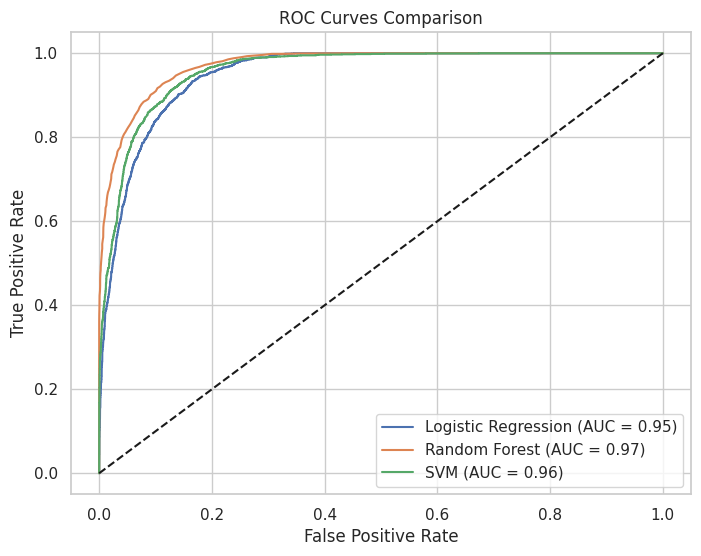

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()


### ROC Curve Analysis

- All three models are **outstanding** with **AUC > 0.90**.  
- **Random Forest** has the **best overall discriminative ability**, followed closely by SVM, and then Logistic Regression.  
- All ROC curves hug the **top-left corner**, indicating the models correctly identify most positive cases with very few false positives.  
- The dashed diagonal line (AUC = 0.50) represents a **random classifier**, and all models perform far better than this baseline.  

**Summary:** All models are highly effective, but **Random Forest** is the marginally best-performing model based on the ROC curve.


## **Precision-Recall curve**

>PR curve tells you how well the model identifies the positive/minority class across thresholds.

>usful for imbalanced dataset

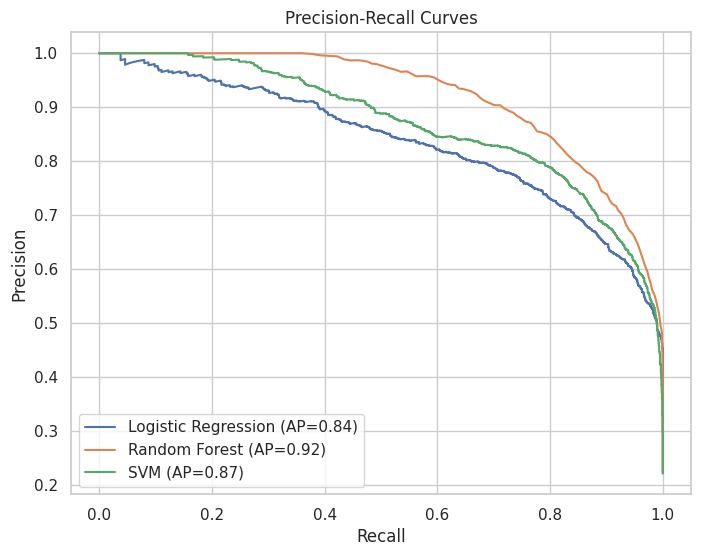

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        avg_prec = average_precision_score(y_test, y_prob)
        plt.plot(recall, precision, label=f'{name} (AP={avg_prec:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


### Performance Ranking by Average Precision (AP)

- **Random Forest**: AP = 0.92 (Orange Line) ✅ – Best  
- **SVM**: AP = 0.87 (Green Line) – Better  
- **Logistic Regression**: AP = 0.84 (Blue Line) – Good  

**Summary:** All three models perform well (AP > 0.80), but **Random Forest is superior**. It maintains **higher precision across a wider range of recall values**, making it the most robust choice for balancing correctly identifying loan defaults (recall) and minimizing false alarms (precision) in this task.


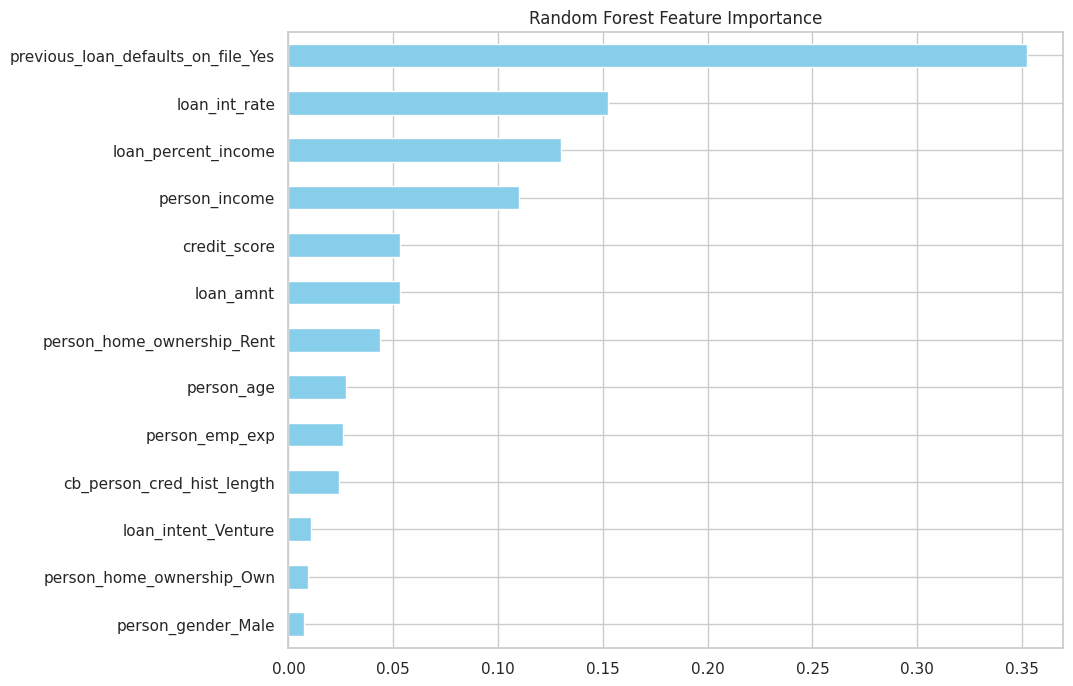

In [ ]:
importances = pd.Series(models['Random Forest'].feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(10,8), color='skyblue', title='Random Forest Feature Importance')
plt.show()


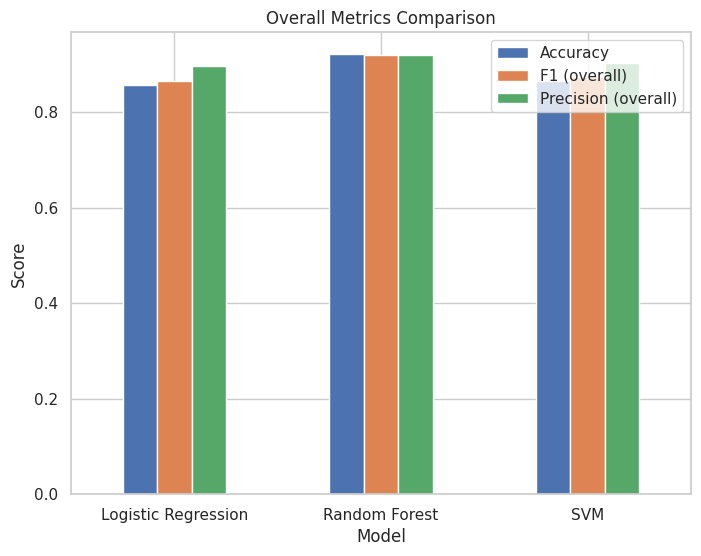

In [ ]:
comparison_df.set_index('Model')[['Accuracy','F1 (overall)','Precision (overall)']].plot(
    kind='bar', figsize=(8,6), rot=0, title='Overall Metrics Comparison'
)
plt.ylabel('Score' )
plt.show()


Random forest is hit

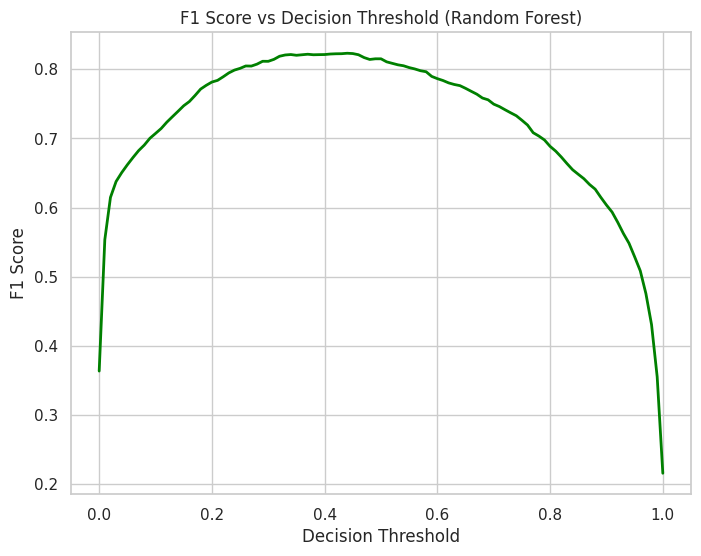

In [ ]:
y_true = y_test  # actual labels
y_scores = rf_model.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(8,6))
plt.plot(thresholds, f1_scores[:-1], color='green', lw=2)
plt.xlabel('Decision Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Decision Threshold (Random Forest)')
plt.grid(True)
plt.show()


### Summary of Findings

- The Random Forest model achieves its best performance (F1 Score > 0.8) when the **decision threshold** is set to approximately **0.4**.  
- At this threshold, the model **balances precision and recall** most effectively for predicting loan defaults.  
- Performance drops significantly if the threshold is set **too low (~0.0)** or **too high (~1.0)**, causing a large imbalance between precision and recall.  
- ✅ **Recommendation:** For the most accurate and balanced predictions in this loan detection project, set the classification threshold to **0.4**.
